In [42]:
import pandas as pd
import scipy as sp
import scipy.stats
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import sklearn as sk
import requests
import time
from sklearn.model_selection import train_test_split
from sklearn import linear_model 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import accuracy_score
from sklearn import preprocessing
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import RobustScaler

In [43]:
# 정제된 데이터가져오기
df = pd.read_csv("df1_16.csv", encoding='utf-8')
df.head(1)


,year,quarter,district,code,workpop,floatpop,prop_2030s,prop_06_11,prop_11_14,prop_14_17,...,no_of_store,no_of_franch_store,no_of_bank,no_of_pharm,no_of_theartre,no_of_accom,no_of_STA,sales,sales_female_ratio,sales_weekday_ratio
0,2018,1,1000001,CS100001,831.0,188508.0,0.409338,0.011467,0.407748,0.151499,...,15.0,0.0,0.0,0.0,16.0,38.0,0.0,922621269.0,0.351752,0.70405


In [44]:
# 시군구 데이터 가져오기
cgoongoo=pd.read_csv("cgoongoo1.csv", encoding='utf-8')
cgoongoo.head(1)

,district,cgoongoo
0,1001453,11620


In [45]:
# 시군구와 정제된 데이터 머지
df1=pd.merge(df, cgoongoo, on=['district'])
df1.head()

,year,quarter,district,code,workpop,floatpop,prop_2030s,prop_06_11,prop_11_14,prop_14_17,...,no_of_franch_store,no_of_bank,no_of_pharm,no_of_theartre,no_of_accom,no_of_STA,sales,sales_female_ratio,sales_weekday_ratio,cgoongoo
0,2018,1,1000001,CS100001,831.0,188508.0,0.409338,0.011467,0.407748,0.151499,...,0.0,0.0,0.0,16.0,38.0,0.0,922621269.0,0.351752,0.704050,11110
1,2018,1,1000001,CS100002,831.0,188508.0,0.473122,0.004000,0.504362,0.157013,...,1.0,0.0,0.0,16.0,38.0,0.0,176034744.0,0.324470,0.769975,11110
2,2018,1,1000001,CS100003,831.0,188508.0,0.440999,0.000000,0.653076,0.120070,...,0.0,0.0,0.0,16.0,38.0,0.0,45454124.0,0.358348,0.848584,11110
3,2018,1,1000001,CS100004,831.0,188508.0,0.575315,0.000597,0.325943,0.269932,...,0.0,0.0,0.0,16.0,38.0,0.0,351079289.0,0.494218,0.548148,11110
4,2018,1,1000001,CS100005,831.0,188508.0,0.503582,0.000282,0.612311,0.163809,...,1.0,0.0,0.0,16.0,38.0,0.0,163624875.0,0.490051,0.845680,11110


In [46]:
df1.columns

Index(['year', 'quarter', 'district', 'code', 'workpop', 'floatpop',
       'prop_2030s', 'prop_06_11', 'prop_11_14', 'prop_14_17', 'prop_17_21',
       'prop_21_24', 'apt_no_of_cmplx', 'apt_avg_space', 'apt_avg_price',
       'inc_monthly_avg', 'expnd_total', 'no_of_store', 'no_of_franch_store',
       'no_of_bank', 'no_of_pharm', 'no_of_theartre', 'no_of_accom',
       'no_of_STA', 'sales', 'sales_female_ratio', 'sales_weekday_ratio',
       'cgoongoo'],
      dtype='object')

In [47]:
df1.drop(['year','quarter','district'],axis=1,inplace=True)


In [51]:
df2=df1[['sales','cgoongoo','code', 'workpop', 'floatpop', 'prop_2030s', 'prop_06_11', 'prop_11_14',
       'prop_14_17', 'prop_17_21', 'prop_21_24', 'apt_no_of_cmplx',
       'apt_avg_space', 'apt_avg_price', 'inc_monthly_avg', 'expnd_total',
       'no_of_store', 'no_of_franch_store', 'no_of_bank', 'no_of_pharm',
       'no_of_theartre', 'no_of_accom', 'no_of_STA',
       'sales_female_ratio', 'sales_weekday_ratio' ]]

In [58]:
# 같은 시군구 코드와 서비스코드 특성 합치기
df5=df2.groupby(['cgoongoo', 'code']).mean()

In [59]:
df5.reset_index(inplace=True)


In [60]:
df5.columns

Index(['cgoongoo', 'code', 'sales', 'workpop', 'floatpop', 'prop_2030s',
       'prop_06_11', 'prop_11_14', 'prop_14_17', 'prop_17_21', 'prop_21_24',
       'apt_no_of_cmplx', 'apt_avg_space', 'apt_avg_price', 'inc_monthly_avg',
       'expnd_total', 'no_of_store', 'no_of_franch_store', 'no_of_bank',
       'no_of_pharm', 'no_of_theartre', 'no_of_accom', 'no_of_STA',
       'sales_female_ratio', 'sales_weekday_ratio'],
      dtype='object')

In [67]:
df5[['sales','cgoongoo', 'code', 'workpop', 'floatpop', 'prop_2030s',
       'prop_06_11', 'prop_11_14', 'prop_14_17', 'prop_17_21', 'prop_21_24',
       'apt_no_of_cmplx', 'apt_avg_space', 'apt_avg_price', 'inc_monthly_avg',
       'expnd_total', 'no_of_store', 'no_of_franch_store', 'no_of_bank',
       'no_of_pharm', 'no_of_theartre', 'no_of_accom', 'no_of_STA',
       'sales_female_ratio', 'sales_weekday_ratio']]

,sales,cgoongoo,code,workpop,floatpop,prop_2030s,prop_06_11,prop_11_14,prop_14_17,prop_17_21,...,expnd_total,no_of_store,no_of_franch_store,no_of_bank,no_of_pharm,no_of_theartre,no_of_accom,no_of_STA,sales_female_ratio,sales_weekday_ratio
0,9.567834e+08,11110,CS100001,517.937500,143890.812500,0.419609,0.023233,0.344812,0.139423,0.361253,...,4.236797e+09,13.729167,0.718750,0.208333,0.750000,1.875000,5.083333,0.000000,0.317979,0.731784
1,1.583477e+08,11110,CS100002,630.765957,153370.829787,0.500840,0.005727,0.404546,0.154362,0.343873,...,3.895627e+09,2.531915,0.212766,0.297872,0.680851,2.468085,7.021277,0.000000,0.313036,0.733950
2,1.836742e+08,11110,CS100003,586.512821,170302.102564,0.502190,0.003332,0.399905,0.129590,0.368834,...,3.982772e+09,2.871795,0.179487,0.410256,0.923077,2.846154,7.692308,0.000000,0.365867,0.786499
3,4.410148e+08,11110,CS100004,559.000000,131077.552239,0.503003,0.023647,0.269134,0.189599,0.366613,...,3.610498e+09,5.850746,0.223881,0.223881,0.656716,2.567164,6.253731,0.000000,0.404660,0.693620
4,2.288919e+08,11110,CS100005,429.015385,164569.446154,0.531617,0.039668,0.330254,0.223170,0.312346,...,4.333676e+09,7.015385,0.938462,0.246154,0.923077,2.292308,6.692308,0.000000,0.448303,0.719481
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1117,7.580852e+07,11740,CS300013,892.042254,315004.647887,0.306682,0.056088,0.209301,0.326711,0.386426,...,1.080390e+10,2.295775,0.000000,0.366197,2.183099,0.000000,1.239437,0.070423,0.616771,0.777035
1118,8.661414e+07,11740,CS300014,924.488889,312854.022222,0.443322,0.067244,0.237532,0.307626,0.361709,...,1.001762e+10,2.922222,0.044444,0.444444,1.733333,0.044444,1.244444,0.088889,0.558992,0.703533
1119,4.112158e+08,11740,CS300015,714.583333,346675.638889,0.220684,0.033091,0.250594,0.478569,0.232336,...,1.129104e+10,3.555556,0.000000,0.416667,2.111111,0.000000,1.083333,0.083333,0.431443,0.734781
1120,1.580321e+08,11740,CS300016,620.863309,276202.172662,0.296084,0.195702,0.264834,0.304176,0.225776,...,1.026187e+10,8.280576,0.028777,0.366906,1.798561,0.000000,0.978417,0.057554,0.292736,0.798727


In [72]:
df6=df5[df5.columns[2:]]
df6

,sales,workpop,floatpop,prop_2030s,prop_06_11,prop_11_14,prop_14_17,prop_17_21,prop_21_24,apt_no_of_cmplx,...,expnd_total,no_of_store,no_of_franch_store,no_of_bank,no_of_pharm,no_of_theartre,no_of_accom,no_of_STA,sales_female_ratio,sales_weekday_ratio
0,9.567834e+08,517.937500,143890.812500,0.419609,0.023233,0.344812,0.139423,0.361253,0.111229,121.208333,...,4.236797e+09,13.729167,0.718750,0.208333,0.750000,1.875000,5.083333,0.000000,0.317979,0.731784
1,1.583477e+08,630.765957,153370.829787,0.500840,0.005727,0.404546,0.154362,0.343873,0.064464,108.297872,...,3.895627e+09,2.531915,0.212766,0.297872,0.680851,2.468085,7.021277,0.000000,0.313036,0.733950
2,1.836742e+08,586.512821,170302.102564,0.502190,0.003332,0.399905,0.129590,0.368834,0.095871,124.897436,...,3.982772e+09,2.871795,0.179487,0.410256,0.923077,2.846154,7.692308,0.000000,0.365867,0.786499
3,4.410148e+08,559.000000,131077.552239,0.503003,0.023647,0.269134,0.189599,0.366613,0.128110,105.059701,...,3.610498e+09,5.850746,0.223881,0.223881,0.656716,2.567164,6.253731,0.000000,0.404660,0.693620
4,2.288919e+08,429.015385,164569.446154,0.531617,0.039668,0.330254,0.223170,0.312346,0.066732,124.707692,...,4.333676e+09,7.015385,0.938462,0.246154,0.923077,2.292308,6.692308,0.000000,0.448303,0.719481
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1117,7.580852e+07,892.042254,315004.647887,0.306682,0.056088,0.209301,0.326711,0.386426,0.020279,242.253521,...,1.080390e+10,2.295775,0.000000,0.366197,2.183099,0.000000,1.239437,0.070423,0.616771,0.777035
1118,8.661414e+07,924.488889,312854.022222,0.443322,0.067244,0.237532,0.307626,0.361709,0.025579,216.733333,...,1.001762e+10,2.922222,0.044444,0.444444,1.733333,0.044444,1.244444,0.088889,0.558992,0.703533
1119,4.112158e+08,714.583333,346675.638889,0.220684,0.033091,0.250594,0.478569,0.232336,0.005410,257.416667,...,1.129104e+10,3.555556,0.000000,0.416667,2.111111,0.000000,1.083333,0.083333,0.431443,0.734781
1120,1.580321e+08,620.863309,276202.172662,0.296084,0.195702,0.264834,0.304176,0.225776,0.009078,224.769784,...,1.026187e+10,8.280576,0.028777,0.366906,1.798561,0.000000,0.978417,0.057554,0.292736,0.798727


In [73]:
# RobustScaling
rb = RobustScaler()
rb.fit(df6)
X_robust_scaled = rb.transform(df6)
dfX=pd.DataFrame(X_robust_scaled, columns= df6.columns)
dfX.head()

,sales,workpop,floatpop,prop_2030s,prop_06_11,prop_11_14,prop_14_17,prop_17_21,prop_21_24,apt_no_of_cmplx,...,expnd_total,no_of_store,no_of_franch_store,no_of_bank,no_of_pharm,no_of_theartre,no_of_accom,no_of_STA,sales_female_ratio,sales_weekday_ratio
0,4.658017,-0.057964,-1.446621,0.026612,-0.423317,0.996238,-0.858730,0.209367,0.395005,-0.688811,...,-1.713968,3.815976,1.938068,-0.448719,-1.235741,37.031250,3.072558,-0.353936,-0.545207,-0.285963
1,0.163735,0.083288,-1.300285,0.516551,-0.613972,1.463013,-0.769434,0.080743,0.056972,-0.823225,...,-1.872198,-0.166481,0.420116,-0.115436,-1.341817,48.744681,4.582341,-0.353936,-0.565329,-0.268948
2,0.306295,0.027887,-1.038931,0.524695,-0.640048,1.426741,-0.917509,0.265468,0.283989,-0.650403,...,-1.831781,-0.045598,0.320280,0.302882,-0.970237,56.211538,5.105118,-0.353936,-0.350277,0.143665
3,1.754828,-0.006557,-1.644409,0.529600,-0.418804,0.404883,-0.558811,0.249037,0.517020,-0.856938,...,-2.004437,1.013907,0.453460,-0.390849,-1.378841,50.701493,3.984374,-0.353936,-0.192365,-0.585623
4,0.560818,-0.169287,-1.127421,0.702181,-0.244333,0.882484,-0.358142,-0.152573,0.073368,-0.652379,...,-1.669037,1.428127,2.597203,-0.307943,-0.970237,45.273077,4.326053,-0.353936,-0.014711,-0.382566


In [74]:
dfX.columns

Index(['sales', 'workpop', 'floatpop', 'prop_2030s', 'prop_06_11',
       'prop_11_14', 'prop_14_17', 'prop_17_21', 'prop_21_24',
       'apt_no_of_cmplx', 'apt_avg_space', 'apt_avg_price', 'inc_monthly_avg',
       'expnd_total', 'no_of_store', 'no_of_franch_store', 'no_of_bank',
       'no_of_pharm', 'no_of_theartre', 'no_of_accom', 'no_of_STA',
       'sales_female_ratio', 'sales_weekday_ratio'],
      dtype='object')

In [75]:
dfX2=dfX.copy()
dfX2.drop(['sales'],axis=1,inplace=True)
dfX2.columns


Index(['workpop', 'floatpop', 'prop_2030s', 'prop_06_11', 'prop_11_14',
       'prop_14_17', 'prop_17_21', 'prop_21_24', 'apt_no_of_cmplx',
       'apt_avg_space', 'apt_avg_price', 'inc_monthly_avg', 'expnd_total',
       'no_of_store', 'no_of_franch_store', 'no_of_bank', 'no_of_pharm',
       'no_of_theartre', 'no_of_accom', 'no_of_STA', 'sales_female_ratio',
       'sales_weekday_ratio'],
      dtype='object')

In [76]:
# 서비스 코드 , 상권코드 콘캣
result=pd.concat([df5[['cgoongoo','code']],dfX], axis=1)
result

,cgoongoo,code,sales,workpop,floatpop,prop_2030s,prop_06_11,prop_11_14,prop_14_17,prop_17_21,...,expnd_total,no_of_store,no_of_franch_store,no_of_bank,no_of_pharm,no_of_theartre,no_of_accom,no_of_STA,sales_female_ratio,sales_weekday_ratio
0,11110,CS100001,4.658017,-0.057964,-1.446621,0.026612,-0.423317,0.996238,-0.858730,0.209367,...,-1.713968,3.815976,1.938068,-0.448719,-1.235741,37.031250,3.072558,-0.353936,-0.545207,-0.285963
1,11110,CS100002,0.163735,0.083288,-1.300285,0.516551,-0.613972,1.463013,-0.769434,0.080743,...,-1.872198,-0.166481,0.420116,-0.115436,-1.341817,48.744681,4.582341,-0.353936,-0.565329,-0.268948
2,11110,CS100003,0.306295,0.027887,-1.038931,0.524695,-0.640048,1.426741,-0.917509,0.265468,...,-1.831781,-0.045598,0.320280,0.302882,-0.970237,56.211538,5.105118,-0.353936,-0.350277,0.143665
3,11110,CS100004,1.754828,-0.006557,-1.644409,0.529600,-0.418804,0.404883,-0.558811,0.249037,...,-2.004437,1.013907,0.453460,-0.390849,-1.378841,50.701493,3.984374,-0.353936,-0.192365,-0.585623
4,11110,CS100005,0.560818,-0.169287,-1.127421,0.702181,-0.244333,0.882484,-0.358142,-0.152573,...,-1.669037,1.428127,2.597203,-0.307943,-0.970237,45.273077,4.326053,-0.353936,-0.014711,-0.382566
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1117,11740,CS300013,-0.300866,0.410385,1.194725,-0.654507,-0.065503,-0.062661,0.260765,0.395660,...,1.331768,-0.250467,-0.218182,0.138884,0.962666,0.000000,0.077913,0.792618,0.671059,0.069354
1118,11740,CS300014,-0.240043,0.451005,1.161527,0.169630,0.055993,0.157936,0.146689,0.212741,...,0.967100,-0.027663,-0.084848,0.430137,0.272715,0.877778,0.081814,1.093270,0.435863,-0.507789
1119,11740,CS300015,1.587094,0.188221,1.683604,-1.173204,-0.315952,0.260007,1.168486,-0.744686,...,1.557697,0.197591,-0.218182,0.326742,0.852235,0.000000,-0.043702,1.002820,-0.083342,-0.262423
1120,11740,CS300016,0.161959,0.070891,0.595762,-0.718429,1.454981,0.371285,0.126064,-0.793233,...,1.080378,1.878110,-0.131851,0.141524,0.372776,0.000000,-0.125438,0.583104,-0.647963,0.239677


In [77]:
#서비스코드 더미화
result2 = pd.get_dummies(result)
result2.columns

Index(['cgoongoo', 'sales', 'workpop', 'floatpop', 'prop_2030s', 'prop_06_11',
       'prop_11_14', 'prop_14_17', 'prop_17_21', 'prop_21_24',
       'apt_no_of_cmplx', 'apt_avg_space', 'apt_avg_price', 'inc_monthly_avg',
       'expnd_total', 'no_of_store', 'no_of_franch_store', 'no_of_bank',
       'no_of_pharm', 'no_of_theartre', 'no_of_accom', 'no_of_STA',
       'sales_female_ratio', 'sales_weekday_ratio', 'code_CS100001',
       'code_CS100002', 'code_CS100003', 'code_CS100004', 'code_CS100005',
       'code_CS100006', 'code_CS100007', 'code_CS100008', 'code_CS100009',
       'code_CS100010', 'code_CS200001', 'code_CS200002', 'code_CS200003',
       'code_CS200004', 'code_CS200005', 'code_CS200006', 'code_CS200007',
       'code_CS200008', 'code_CS200009', 'code_CS200010', 'code_CS200011',
       'code_CS200012', 'code_CS200013', 'code_CS200014', 'code_CS200015',
       'code_CS200016', 'code_CS200017', 'code_CS200018', 'code_CS300001',
       'code_CS300002', 'code_CS300003', 'co

In [78]:
result3 = pd.get_dummies(result2['cgoongoo'], prefix='d')
result3.columns

Index(['d_11110', 'd_11140', 'd_11170', 'd_11200', 'd_11215', 'd_11230',
       'd_11260', 'd_11290', 'd_11305', 'd_11320', 'd_11350', 'd_11380',
       'd_11410', 'd_11440', 'd_11470', 'd_11500', 'd_11530', 'd_11545',
       'd_11560', 'd_11590', 'd_11620', 'd_11650', 'd_11680', 'd_11710',
       'd_11740'],
      dtype='object')

In [79]:
result4 = pd.concat([result2,result3] ,axis=1)
result4.head()
result4.drop(['cgoongoo','sales'],axis=1,inplace=True )
result4.columns

Index(['workpop', 'floatpop', 'prop_2030s', 'prop_06_11', 'prop_11_14',
       'prop_14_17', 'prop_17_21', 'prop_21_24', 'apt_no_of_cmplx',
       'apt_avg_space', 'apt_avg_price', 'inc_monthly_avg', 'expnd_total',
       'no_of_store', 'no_of_franch_store', 'no_of_bank', 'no_of_pharm',
       'no_of_theartre', 'no_of_accom', 'no_of_STA', 'sales_female_ratio',
       'sales_weekday_ratio', 'code_CS100001', 'code_CS100002',
       'code_CS100003', 'code_CS100004', 'code_CS100005', 'code_CS100006',
       'code_CS100007', 'code_CS100008', 'code_CS100009', 'code_CS100010',
       'code_CS200001', 'code_CS200002', 'code_CS200003', 'code_CS200004',
       'code_CS200005', 'code_CS200006', 'code_CS200007', 'code_CS200008',
       'code_CS200009', 'code_CS200010', 'code_CS200011', 'code_CS200012',
       'code_CS200013', 'code_CS200014', 'code_CS200015', 'code_CS200016',
       'code_CS200017', 'code_CS200018', 'code_CS300001', 'code_CS300002',
       'code_CS300003', 'code_CS300004', 'code_C

In [80]:
import numpy as np
np.log(df5['sales'])

0       20.679088
1       18.880304
2       19.028674
3       19.904589
4       19.248760
          ...    
1117    18.143721
1118    18.276974
1119    19.834629
1120    18.878309
1121    18.420406
Name: sales, Length: 1122, dtype: float64

In [81]:
# OLS
import statsmodels.api as sm

X= result4
y= np.log(df5['sales'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

df_train=pd.concat([y_train, X_train], axis=1)

model= sm.OLS.from_formula("sales ~ "+" + ".join(df_train.columns[1:]), data=df_train)
result =  model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.754
Model:                            OLS   Adj. R-squared:                  0.722
Method:                 Least Squares   F-statistic:                     23.59
Date:                Mon, 16 Dec 2019   Prob (F-statistic):          1.02e-158
Time:                        19:23:01   Log-Likelihood:                -638.65
No. Observations:                 785   AIC:                             1459.
Df Residuals:                     694   BIC:                             1884.
Df Model:                          90                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              17.2447    

In [82]:
# 모델 생성
lm = linear_model.LinearRegression()

# 학습
lm.fit(X_train, y_train)

# 예측
pred_y = lm.predict(X_train)

print("정확도 : ", str(round(lm.score(X_test, y_test), 4) * 100) + "%")

정확도 :  68.86%


In [85]:
# LASSO 모형
#importing libraries
import seaborn as sns
import statsmodels.api as sm
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso

In [86]:
reg = LassoCV()
reg.fit(X, y)
print("Best alpha using built-in LassoCV: %f" % reg.alpha_)
print("Best score using built-in LassoCV: %f" %reg.score(X,y))
coef = pd.Series(reg.coef_, index = X.columns)

Best alpha using built-in LassoCV: 0.003067
Best score using built-in LassoCV: 0.730211


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


In [87]:
print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

Lasso picked 61 variables and eliminated the other 31 variables


Text(0.5, 1.0, 'Feature importance using Lasso Model')

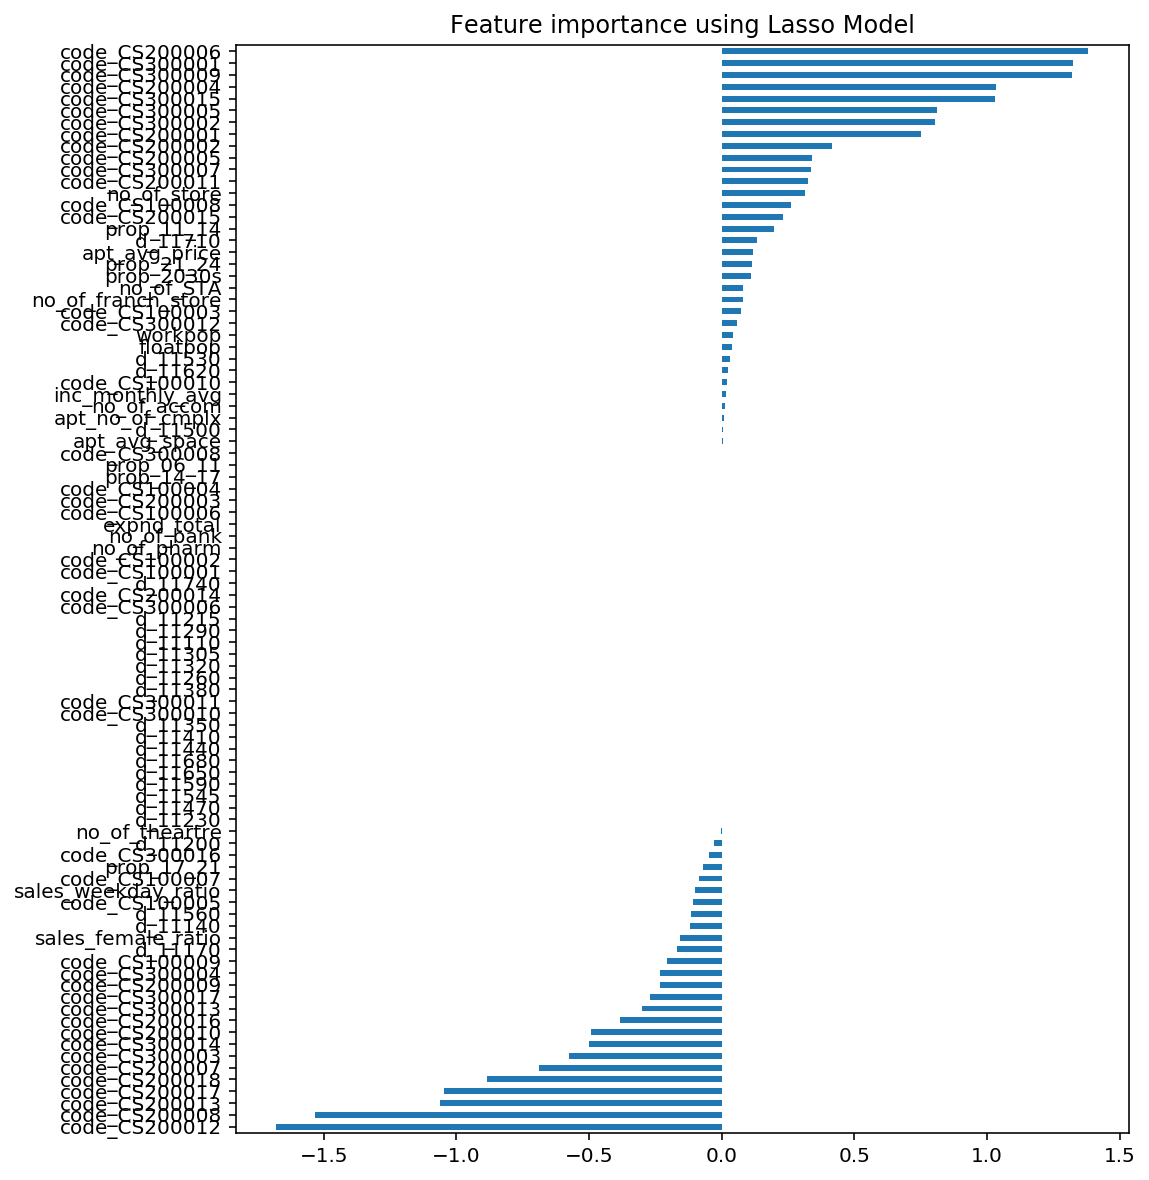

In [88]:
imp_coef = coef.sort_values()
import matplotlib
matplotlib.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title("Feature importance using Lasso Model")

In [105]:
drop_columns=imp_coef[imp_coef.values==0].index

In [112]:
result4.drop(columns=drop_columns,inplace=True )


In [113]:
result4.columns

Index(['workpop', 'floatpop', 'prop_2030s', 'prop_11_14', 'prop_17_21',
       'prop_21_24', 'apt_no_of_cmplx', 'apt_avg_space', 'apt_avg_price',
       'inc_monthly_avg', 'no_of_store', 'no_of_franch_store',
       'no_of_theartre', 'no_of_accom', 'no_of_STA', 'sales_female_ratio',
       'sales_weekday_ratio', 'code_CS100003', 'code_CS100005',
       'code_CS100007', 'code_CS100008', 'code_CS100009', 'code_CS100010',
       'code_CS200001', 'code_CS200002', 'code_CS200004', 'code_CS200005',
       'code_CS200006', 'code_CS200007', 'code_CS200008', 'code_CS200009',
       'code_CS200010', 'code_CS200011', 'code_CS200012', 'code_CS200013',
       'code_CS200015', 'code_CS200016', 'code_CS200017', 'code_CS200018',
       'code_CS300001', 'code_CS300002', 'code_CS300003', 'code_CS300004',
       'code_CS300005', 'code_CS300007', 'code_CS300008', 'code_CS300009',
       'code_CS300012', 'code_CS300013', 'code_CS300014', 'code_CS300015',
       'code_CS300016', 'code_CS300017', 'd_11140', 

In [114]:
# OLS
import statsmodels.api as sm

X= result4
y= np.log(df5['sales'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

df_train=pd.concat([y_train, X_train], axis=1)

model= sm.OLS.from_formula("sales ~ "+" + ".join(df_train.columns[1:]), data=df_train)
result =  model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.734
Model:                            OLS   Adj. R-squared:                  0.712
Method:                 Least Squares   F-statistic:                     32.74
Date:                Mon, 16 Dec 2019   Prob (F-statistic):          2.18e-168
Time:                        19:39:25   Log-Likelihood:                -668.50
No. Observations:                 785   AIC:                             1461.
Df Residuals:                     723   BIC:                             1750.
Df Model:                          61                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              18.3477    

In [115]:
#오차합 구하기
y_pred = result .predict(X_test)
resid=y_test-y_pred
rss=np.sum(resid**2)
MSE=rss/(result.nobs-2)

#RMSE 구하기
from statsmodels.tools.eval_measures import rmse

rmse = rmse(y_test, y_pred)
MSE, rmse

(0.1412151113570022, 0.5728046264104272)

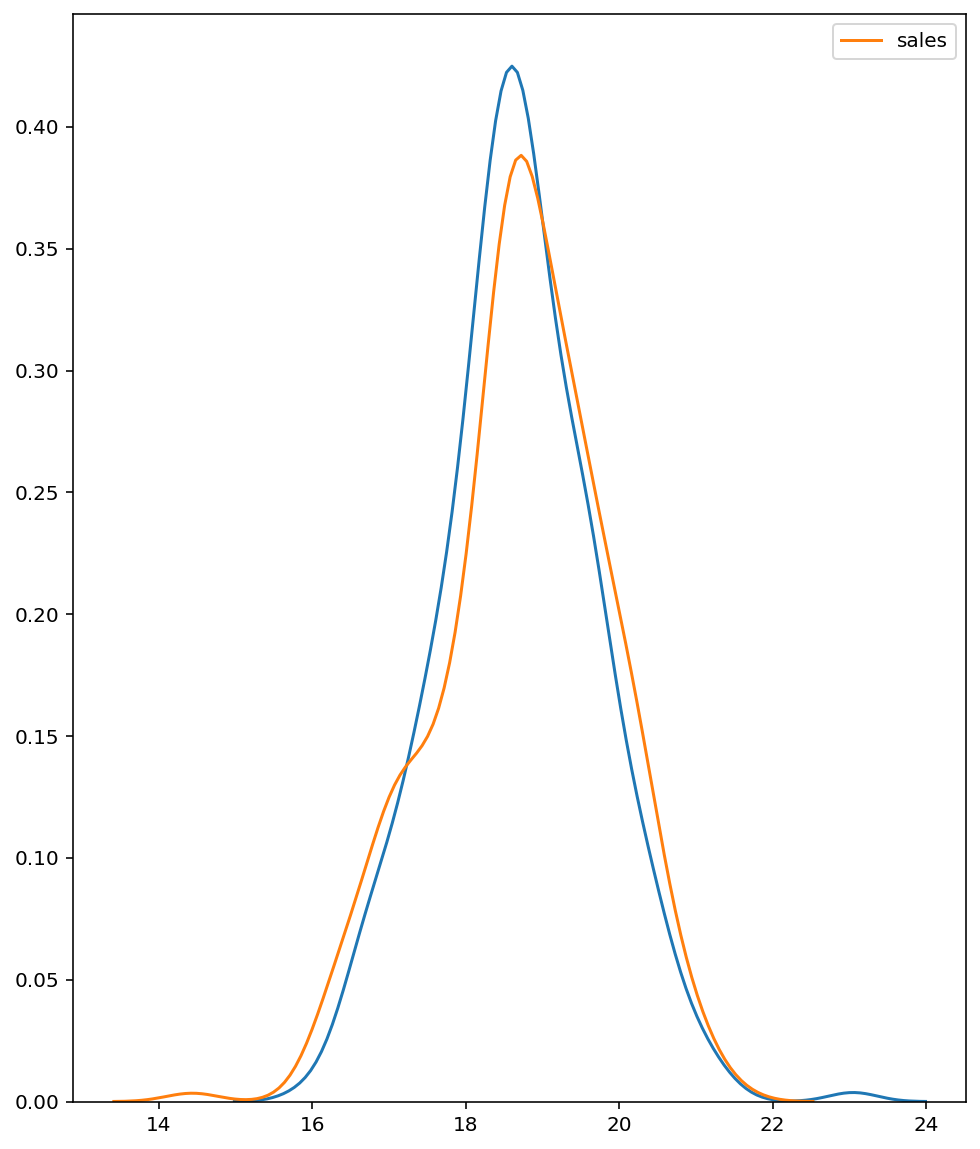

In [116]:
y_pred = result .predict(X_test)
sns.kdeplot(y_pred)
sns.kdeplot(y_test)
# plt.title("")
plt.show()


In [ ]:
# 파랑색: 모델링으로 예측한 y_pred 값
# 오렌지: 원래 sales 값

#### 1. 과최적화 일어났는지 K-fold 교차검증

In [ ]:
# OLS
import statsmodels.api as sm

X= result4
y= np.log(df5['sales'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

df_train=pd.concat([y_train, X_train], axis=1)

model= sm.OLS.from_formula("sales ~ "+" + ".join(df_train.columns[1:]), data=df_train)
result =  model.fit()
print(result.summary())

In [128]:
from sklearn.model_selection import KFold

df_kfold=pd.concat([y,X], axis=1)
train_r2=[]
test_r2 =[]
scores = np.zeros(5)
cv = KFold(5, shuffle=True)
for i, (idx_train, idx_test) in enumerate(cv.split( df_kfold)):
    df_train =  df_kfold.iloc[idx_train]
    df_test =  df_kfold.iloc[idx_test]
    
    model = sm.OLS.from_formula("sales ~"+"+".join(df_kfold.columns[1:]), data= df_kfold)
    result = model.fit()
    
    pred = result.predict(df_test)
    rss = (( df_kfold.sales - pred) ** 2).sum()
    tss = (( df_kfold.sales -  df_kfold.sales.mean())** 2).sum()
    rsquared = 1 - rss / tss
    
    scores[i] = rsquared
    print("학습 R2 = {:.8f}, 검증 R2 = {:.8f}".format(result.rsquared, rsquared))
    train_r2.append(result.rsquared)
    test_r2.append(rsquared)
    


학습 R2 = 0.74785133, 검증 R2 = 0.93140990
학습 R2 = 0.74785133, 검증 R2 = 0.94692376
학습 R2 = 0.74785133, 검증 R2 = 0.95237811
학습 R2 = 0.74785133, 검증 R2 = 0.95593574
학습 R2 = 0.74785133, 검증 R2 = 0.96120382


(0.5, 1.2)

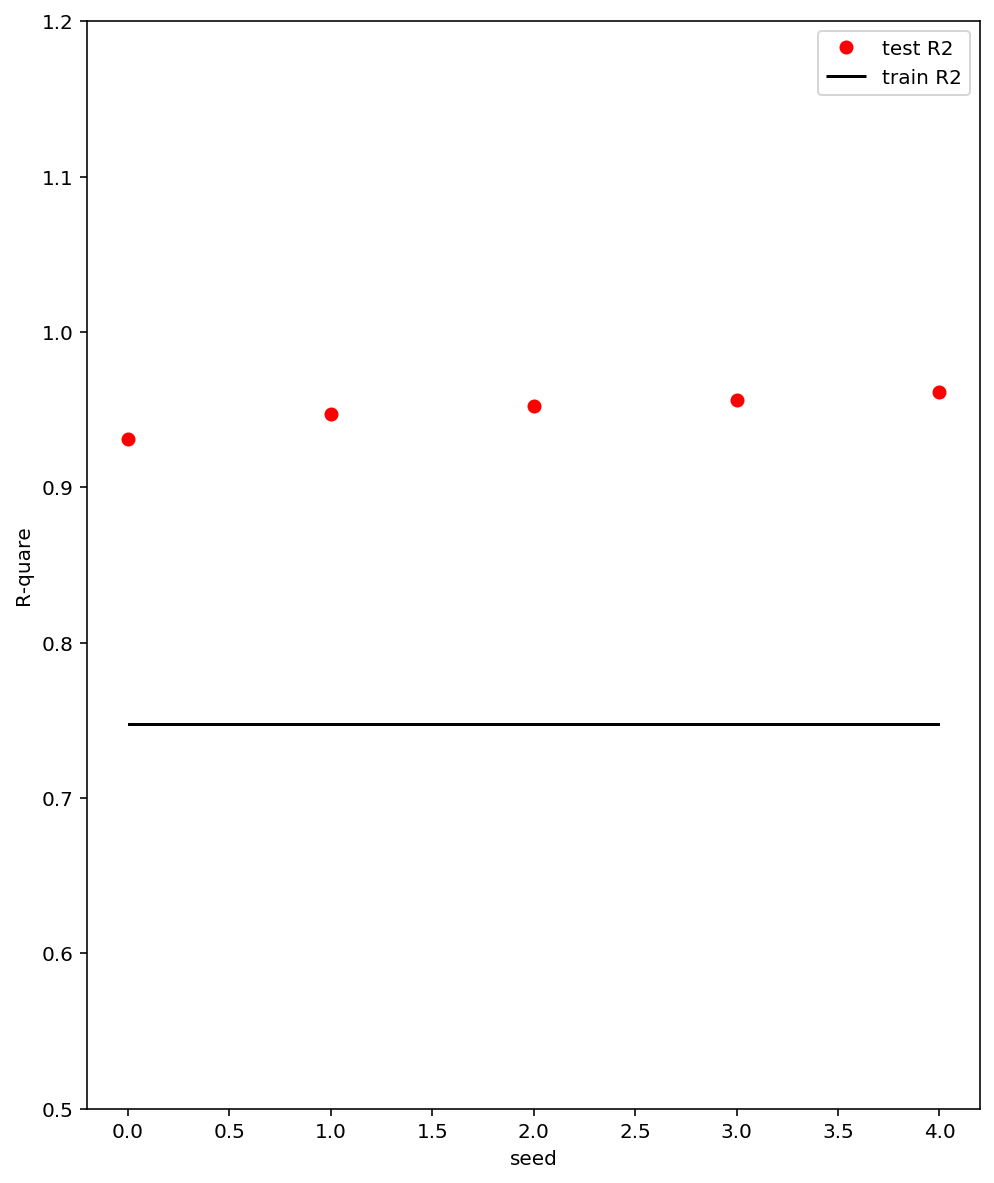

In [133]:

plt.plot(test_r2, 'ro', label="test R2")
plt.hlines(train_r2, 0, 4, label="train R2")
plt.legend()
plt.xlabel("seed")
plt.ylabel("R-quare")

plt.ylim(0.5, 1.2)